In [1]:
#########################
##                     ##
## Irving Gomez Mendez ##
##     May 04, 2021    ##
##                     ##
#########################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.interpolate as interpolate
from localreg import *

In [3]:
# Data from Hosmer, D.W. & Lemeshow, S. (1989) Applied logistic regression. Wiley
# Data are ages (in years) and indicator of significant damage in the coronary of 100 people
dat = pd.read_csv('Heart_Disease_vs_Age.csv')
dat = dat.sort_values('age')

n = dat.shape[0]
x = dat['age']
y = dat['chd']
X = np.vstack([np.ones(n), x]).T

n0 = 50
x0 = np.linspace(dat['age'].min(), dat['age'].max(), n0)
X0 = np.vstack([np.ones(n0), x0]).T

Text(0, 0.5, 'Prob. of Coronary Heart Disease')

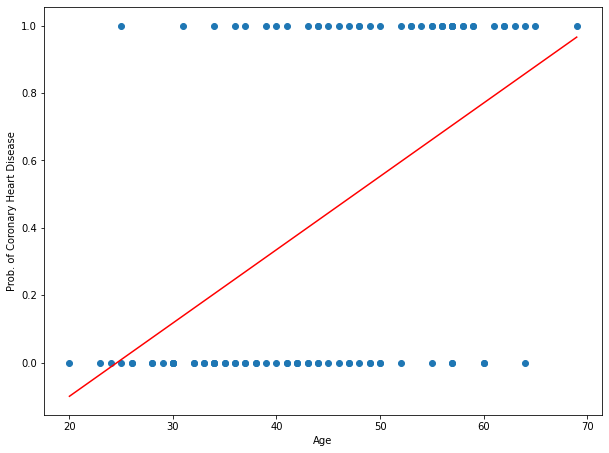

In [4]:
# Linear Regression
linear_reg = sm.OLS(y, X).fit()
plt.figure(figsize=(10,7.5))
plt.plot(x, y, 'o')
plt.plot(x0, linear_reg.predict(X0), 'r')
plt.xlabel('Age')
plt.ylabel('Prob. of Coronary Heart Disease')

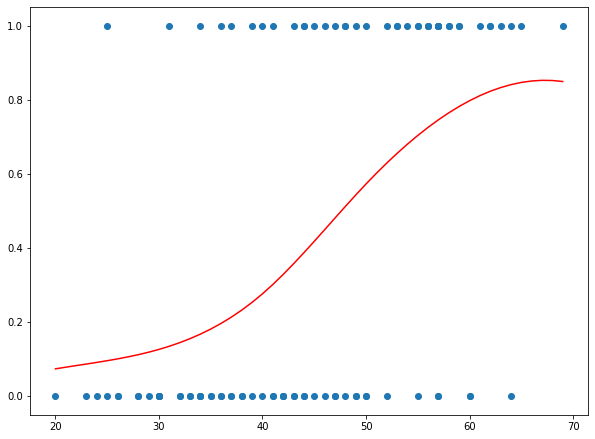

In [5]:
# Cubic Splines
tck = interpolate.splrep(x,y, t=[40,50], k=3)
y_hat = interpolate.splev(x, tck)
y0 = interpolate.splev(x0, tck)
plt.figure(figsize=(10,7.5))
plt.plot(x, y, 'o')
plt.plot(x0, y0, 'r')

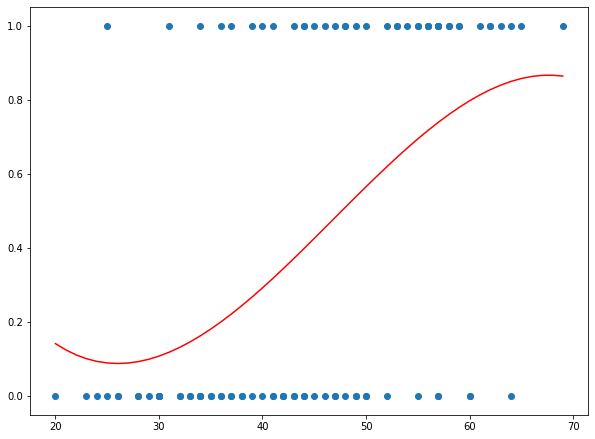

In [6]:
# Smooth Splines
spl = interpolate.UnivariateSpline(x, y)
plt.figure(figsize=(10,7.5))
plt.plot(x, y, 'o')
plt.plot(x0, spl(x0), 'r')

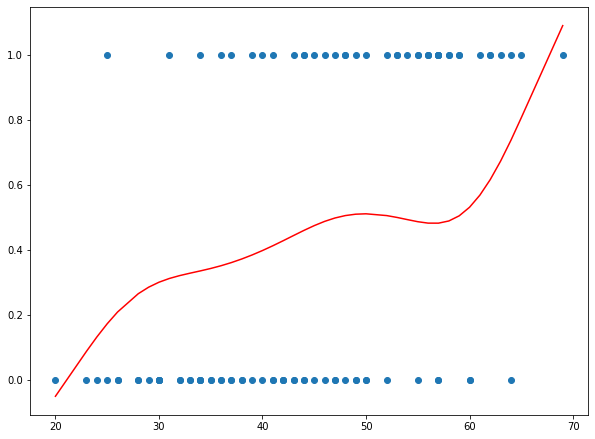

In [7]:
# Local Polinomial
local_polinomial = localreg(np.array(x), y, degree=1, kernel=rbf.gaussian, radius=5)
plt.figure(figsize=(10,7.5))
plt.plot(x, y, 'o')
plt.plot(x, local_polinomial, 'r')

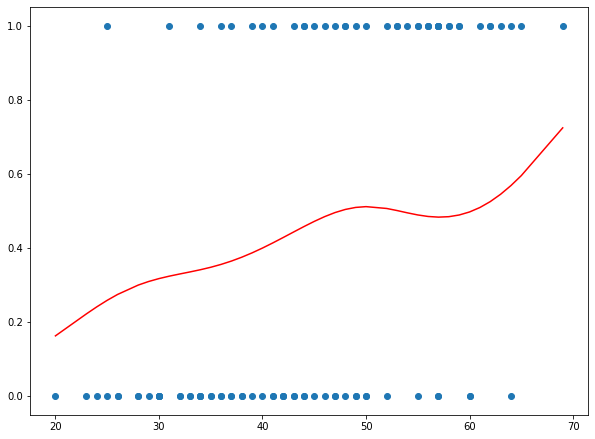

In [8]:
# Nadaraya-Watson
local_polinomial = localreg(np.array(x), y, degree=0, kernel=rbf.gaussian, radius=5)
plt.figure(figsize=(10,7.5))
plt.plot(x, y, 'o')
plt.plot(x, local_polinomial, 'r')